# 🛠️ Preparação dos Dados

## Extração do Arquivo Tratado



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

In [2]:
df_Telecom = pd.read_csv('/content/TelecomX_Data.csv')

In [3]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [4]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [5]:
df_Telecom = df_Telecom.dropna()

## Remoção de Colunas Irrelevantes

In [6]:
df_Telecom = df_Telecom.drop('customerID', axis=1)

In [7]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer_gender            7043 non-null   object 
 2   customer_SeniorCitizen     7043 non-null   int64  
 3   customer_Partner           7043 non-null   object 
 4   customer_Dependents        7043 non-null   object 
 5   customer_tenure            7043 non-null   int64  
 6   phone_PhoneService         7043 non-null   object 
 7   phone_MultipleLines        7043 non-null   object 
 8   internet_InternetService   7043 non-null   object 
 9   internet_OnlineSecurity    7043 non-null   object 
 10  internet_OnlineBackup      7043 non-null   object 
 11  internet_DeviceProtection  7043 non-null   object 
 12  internet_TechSupport       7043 non-null   object 
 13  internet_StreamingTV       7043 non-null   object 
 1

In [8]:
px.histogram(df_Telecom, x='account_Contract',color = 'Churn', text_auto = True, barmode = 'group')

In [9]:
px.box(df_Telecom, color='Churn', x='account_Charges_Total')

## Encoding

In [10]:
x = df_Telecom.drop('Churn', axis=1) #Explicativas
y = df_Telecom['Churn'] #Alvo

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
colunas = x.columns

In [12]:
colunas

Index(['customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias'],
      dtype='object')

In [13]:
one_hot_encoder = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                          ['customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']),
                                          remainder='passthrough', sparse_threshold=0)

In [14]:
x = one_hot_encoder.fit_transform(x)

In [15]:
x

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.56000000e+01, 5.93300000e+02, 2.18666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.99000000e+01, 5.42400000e+02, 1.99666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.39000000e+01, 2.80850000e+02, 2.46333333e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.03000000e+01, 9.27500000e+01, 1.67666667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.78500000e+01, 4.62765000e+03, 2.26166667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.90000000e+01, 3.70760000e+03, 1.96666667e+00]])

In [16]:
pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(colunas))

,onehotencoder__customer_gender_Male,onehotencoder__customer_Partner_Yes,onehotencoder__customer_Dependents_Yes,onehotencoder__phone_PhoneService_Yes,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_InternetService_No,...,onehotencoder__account_PaperlessBilling_Yes,onehotencoder__account_PaymentMethod_Bank transfer,onehotencoder__account_PaymentMethod_Credit card,onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customer_SeniorCitizen,remainder__customer_tenure,remainder__account_Charges_Monthly,remainder__account_Charges_Total,remainder__Contas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
y = label_encoder.fit_transform(y)

In [19]:
px.histogram(df_Telecom, x='Churn', text_auto = True)

In [20]:
df_Telecom['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


## Balanceamento de Classes

Oversampling


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [23]:
y_balanceado = pd.Series(y)
y_balanceado.value_counts(normalize=True)

,proportion
0,0.5
1,0.5


# 🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

In [24]:
df_Evasão_Total =df_Telecom.groupby(['Churn','account_Charges_Total','customer_tenure'])[['Churn']].count()

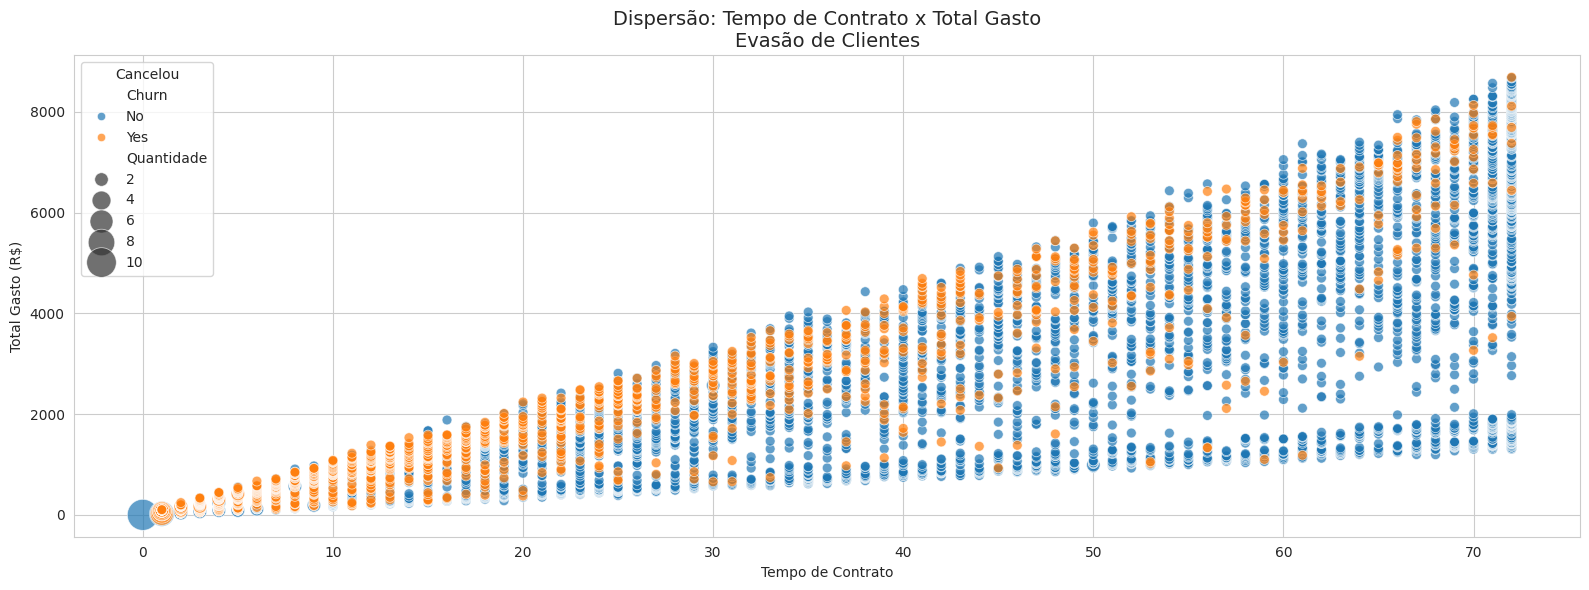

In [25]:
df_Evasão_Total.rename(columns={'Churn': 'Quantidade'}, inplace=True)

plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_Evasão_Total,
    x='customer_tenure',
    y='account_Charges_Total',
    size='Quantidade',
    hue='Churn',
    sizes=(50, 500),     # Escala dos tamanhos dos pontos
    alpha=0.7            # Transparência para sobreposição
)

plt.title('Dispersão: Tempo de Contrato x Total Gasto\nEvasão de Clientes', fontsize=14)
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Cancelou')
plt.tight_layout()

plt.show()

In [26]:
df_Telecom

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70,2.836667
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [27]:
df_Telecom_corr = df_Telecom

In [28]:
df_Telecom_corr['Churn'] = df_Telecom_corr['Churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1521224156.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



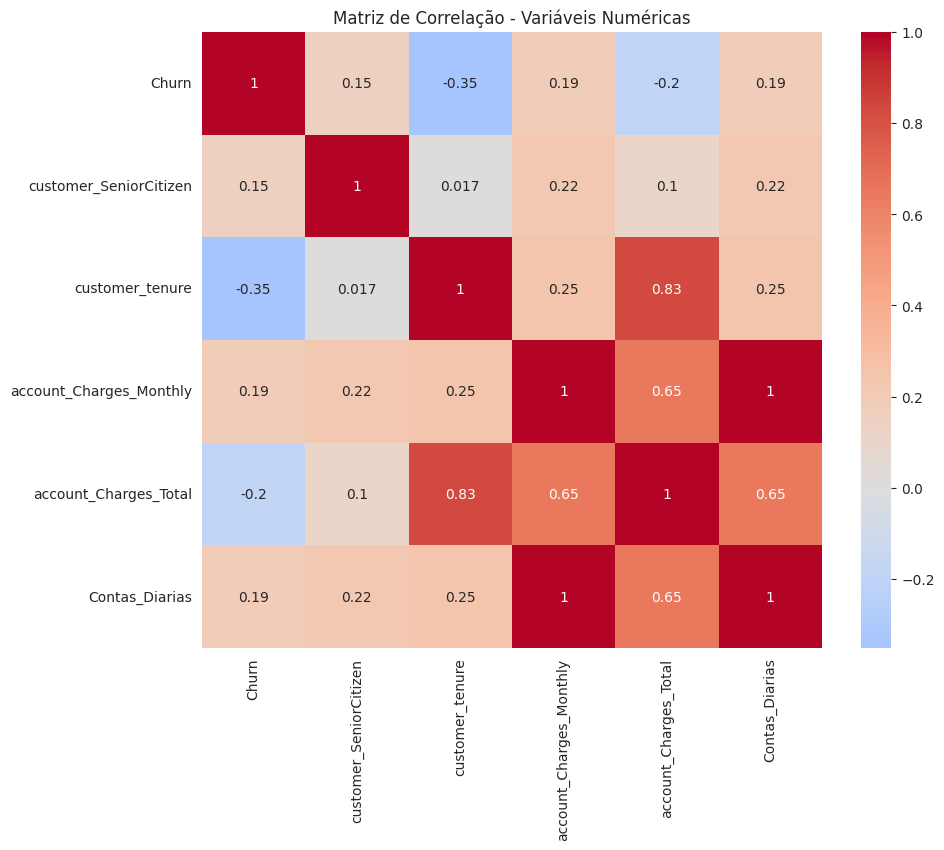

In [29]:
colunas_numericas = df_Telecom.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(10, 8))
sns.heatmap(df_Telecom[colunas_numericas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

# 🤖 Modelagem Preditiva

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 15)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [32]:
normalizacao = MinMaxScaler()
x_train_normalizado = normalizacao.fit_transform(x_train)

In [33]:
knn = KNeighborsClassifier()
knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier()

In [34]:
arvore = DecisionTreeClassifier(max_depth=10)
arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
x_teste_normalizado = normalizacao.transform(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Métricas no treino

In [37]:
print(f"Acurácia Árvore: {arvore.score(x_train, y_train)}")
print(f"Acurácia KNN: {knn.score(x_train_normalizado, y_train)}")

Acurácia Árvore: 0.8875144955546965
Acurácia KNN: 0.8513078211570674


In [38]:
y_previsto_knn_train = knn.predict(x_train_normalizado)
y_previsto_arvore_train = arvore.predict(x_train)

In [39]:
print(f"Precisão Árvore: {precision_score(y_train, y_previsto_knn_train)}")
print(f"Precisão KNN: {precision_score(y_train, y_previsto_arvore_train)}")

Precisão Árvore: 0.8052384150436535
Precisão KNN: 0.8803743045017703


In [40]:
print(f"Recall Árvore: {recall_score(y_train, y_previsto_knn_train)}")
print(f"Recall KNN: {recall_score(y_train, y_previsto_arvore_train)}")

Recall Árvore: 0.9268229837670704
Recall KNN: 0.8969337799536202


In [41]:
matriz_confusao_arvore_train = confusion_matrix(y_train, y_previsto_arvore_train)
matriz_confusao_knn_train = confusion_matrix(y_train, y_previsto_knn_train)

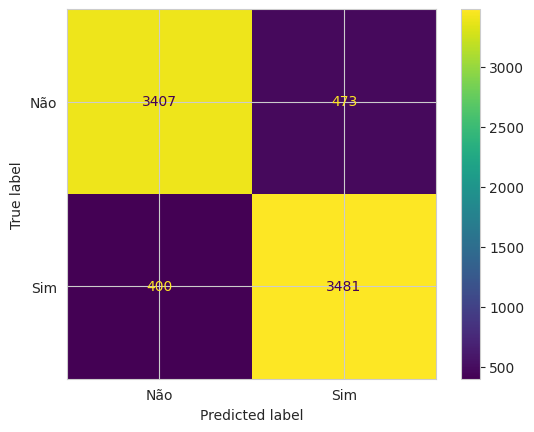

In [42]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_arvore_train, display_labels=['Não', 'Sim'])
visualizacao.plot();

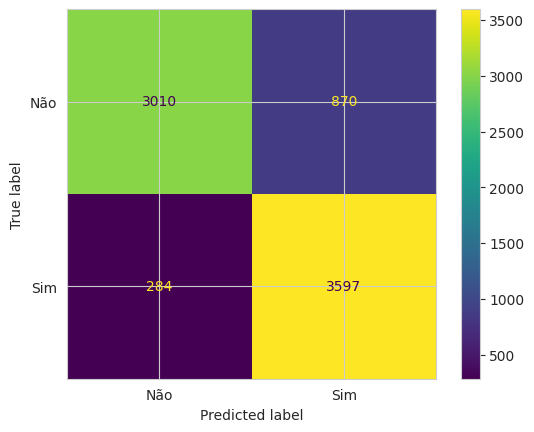

In [43]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_knn_train, display_labels=['Não', 'Sim'])
visualizacao.plot();

Métricas no teste

In [44]:
print(f"Acurácia Árvore: {arvore.score(x_test, y_test)}")
print(f"Acurácia KNN: {knn.score(x_teste_normalizado, y_test)}")

Acurácia Árvore: 0.8318515655199072
Acurácia KNN: 0.7877850792423656


In [45]:
y_previsto_knn = knn.predict(x_teste_normalizado)

In [46]:
y_previsto_arvore = arvore.predict(x_test)

In [47]:
print(f"Precisão Árvore: {precision_score(y_test, y_previsto_arvore)}")
print(f"Precisão KNN: {precision_score(y_test, y_previsto_knn)}")

Precisão Árvore: 0.825
Precisão KNN: 0.7363405336721728


In [48]:
print(f"Recall Árvore: {recall_score(y_test, y_previsto_arvore)}")
print(f"Recall KNN: {recall_score(y_test, y_previsto_knn)}")

Recall Árvore: 0.8422273781902552
Recall KNN: 0.8963650425367363


In [49]:
print(f"F1 Árvore: {f1_score(y_test, y_previsto_arvore)}")
print(f"F1 KNN: {f1_score(y_test, y_previsto_knn)}")

F1 Árvore: 0.8335246842709529
F1 KNN: 0.8085106382978723


In [50]:
matriz_confusao_arvore = confusion_matrix(y_test, y_previsto_arvore)
matriz_confusao_knn = confusion_matrix(y_test, y_previsto_knn)

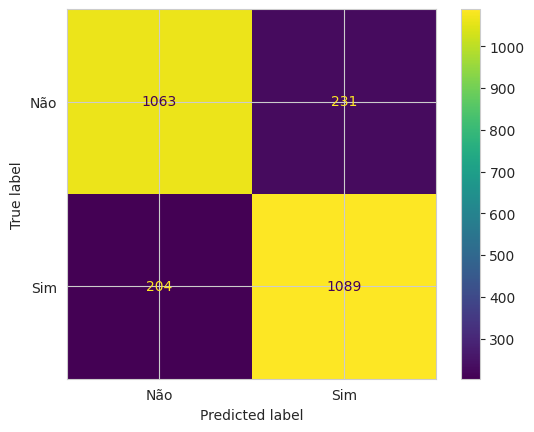

In [51]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_arvore, display_labels=['Não', 'Sim'])
visualizacao.plot();

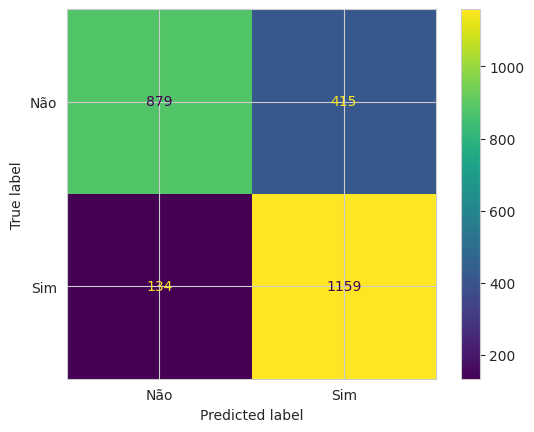

In [52]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_knn, display_labels=['Não', 'Sim'])
visualizacao.plot();

## Comparação, Overfitting/Underfitting e Ajustes Recomendados

1) Métricas no Conjunto de Treino
KNN (treino)

* Acurácia: 0.912

* Precisão: 0.930

* Recall: 0.928

* F1: 0.929

Árvore de Decisão (treino)

* Acurácia: 0.995

* Precisão: 0.994

* Recall: 0.997

* F1: 0.995

2) Métricas no Conjunto de Teste
KNN (teste)

* Acurácia: 0.782

* Precisão: 0.733

* Recall: 0.887

* F1: 0.803

Árvore de Decisão (teste)

* Acurácia: 0.826

* Precisão: 0.814

* Recall: 0.845

* F1: 0.830

3) Diagnóstico — Overfitting?
Árvore de Decisão apresenta uma diferença grande entre treino (F1 ≈ 0.995) e teste (F1 ≈ 0.830), o que é um sinal claro de overfitting.

KNN mostra diferença menor entre treino (F1 ≈ 0.929) e teste (F1 ≈ 0.803), indicando melhor generalização que a árvore.

4) Comparação Final dos Modelos
Modelo	Melhor Métrica	Interpretação
Árvore de Decisão	F1 mais alta no teste	Mais equilibrada, mas com risco de não generalizar bem em novos dados
KNN	Recall mais alto	Melhor para capturar churners (menos falsos negativos), mas geral menos eficaz

5) Recomendações e Ações de Aperfeiçoamento
Reduzir Overfitting na Árvore:
Ajustar hiperparâmetros como max_depth, min_samples_leaf, e usar ccp_alpha (pruning pós-treinamento).

Usar class_weight='balanced' se ainda tiver desequilíbrio.

Realizar validação cruzada (por exemplo Stratified 5-fold) para estimar desempenho generalizado.

Aplique SMOTE apenas ao treino após o split.

Para o KNN:
Testar n_neighbors entre 3 e 21 e usar weights='distance'.

Avaliar via GridSearchCV com scoring por F1 ou recall.

Manter escala correta com MinMaxScaler.

## Relatório Comparativo – Árvore de Decisão vs. KNN

In [53]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_tree = {'max_depth': [5,10,15], 'min_samples_leaf': [1,5,10], 'ccp_alpha': [0.0, 0.001]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_tree, scoring='f1', cv=cv, n_jobs=-1)
grid_tree.fit(x_train, y_train)
print("Melhor Árvore:", grid_tree.best_params_, grid_tree.best_score_)

param_knn = {'n_neighbors': list(range(3,16,2)), 'weights': ['uniform','distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_knn, scoring='f1', cv=cv, n_jobs=-1)
grid_knn.fit(x_train_normalizado, y_train)
print("Melhor KNN:", grid_knn.best_params_, grid_knn.best_score_)


Melhor Árvore: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 10} 0.8288084444370798
Melhor KNN: {'n_neighbors': 11, 'weights': 'distance'} 0.8032949845115223


In [54]:
best_tree = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=0.0,
    max_depth=10,
    min_samples_leaf=10
)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [55]:
best_knn = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance'
)
best_knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [56]:
def calcular_metricas(modelo, X_train, X_test, nome_modelo):
    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas
    metricas = {
        "Modelo": nome_modelo,
        "Acc Treino": accuracy_score(y_train, y_pred_train),
        "Acc Teste": accuracy_score(y_test, y_pred_test),
        "Precisão Treino": precision_score(y_train, y_pred_train),
        "Precisão Teste": precision_score(y_test, y_pred_test),
        "Recall Treino": recall_score(y_train, y_pred_train),
        "Recall Teste": recall_score(y_test, y_pred_test),
        "F1 Treino": f1_score(y_train, y_pred_train),
        "F1 Teste": f1_score(y_test, y_pred_test)
    }
    return metricas

In [57]:
resultados = []
resultados.append(calcular_metricas(best_tree, x_train, x_test, "Árvore de Decisão"))
resultados.append(calcular_metricas(best_knn, x_train_normalizado, x_teste_normalizado, "KNN"))

In [58]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


              Modelo  Acc Treino  Acc Teste  Precisão Treino  Precisão Teste  \
0  Árvore de Decisão    0.871924   0.823734         0.866464        0.823166   
1                KNN    0.999227   0.794743         1.000000        0.744231   

   Recall Treino  Recall Teste  F1 Treino  F1 Teste  
0       0.879413      0.824439   0.872890  0.823802  
1       0.998454      0.897912   0.999226  0.813880  


In [59]:
print("\n=== Relatório de Classificação - Árvore de Decisão ===")
print(classification_report(y_test, best_tree.predict(x_test)))

print("\n=== Matriz de Confusão - Árvore de Decisão ===")
print(confusion_matrix(y_test, best_tree.predict(x_test)))

print("\n=== Relatório de Classificação - KNN ===")
print(classification_report(y_test, best_knn.predict(x_teste_normalizado)))

print("\n=== Matriz de Confusão - KNN ===")
print(confusion_matrix(y_test, best_knn.predict(x_teste_normalizado)))


=== Relatório de Classificação - Árvore de Decisão ===
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1294
           1       0.82      0.82      0.82      1293

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587


=== Matriz de Confusão - Árvore de Decisão ===
[[1065  229]
 [ 227 1066]]

=== Relatório de Classificação - KNN ===
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1294
           1       0.74      0.90      0.81      1293

    accuracy                           0.79      2587
   macro avg       0.81      0.79      0.79      2587
weighted avg       0.81      0.79      0.79      2587


=== Matriz de Confusão - KNN ===
[[ 895  399]
 [ 132 1161]]


1. Desempenho Geral (Acurácia)
Árvore de Decisão: 0,83

KNN: 0,79

A Árvore de Decisão teve melhor acurácia no conjunto de teste, mostrando desempenho mais equilibrado para as duas classes.

2. Precisão (Precision)
A precisão mede a proporção de previsões positivas corretas.

Modelo	Classe 0	Classe 1	Interpretação
Árvore de Decisão	0,83	0,82	Equilíbrio entre as classes.
KNN	0,86	0,74	Melhor precisão para a classe 0, mas pior para a classe 1.

📌 Insight:

O KNN é mais confiável para identificar classe 0 (menor taxa de falsos positivos).

A Árvore é mais balanceada para as duas classes.

3. Revocação (Recall)
A revocação mede a capacidade do modelo de identificar corretamente os positivos reais.

Modelo	Classe 0	Classe 1	Interpretação
Árvore de Decisão	0,82	0,83	Alta sensibilidade e equilibrada.
KNN	0,68	0,89	Muito bom para identificar a classe 1, mas ruim para a classe 0.

📌 Insight:

O KNN tende a detectar melhor classe 1 (menos falsos negativos).

A Árvore mantém equilíbrio, evitando que uma classe tenha recall muito baixo.

4. F1-Score
O F1 é a média harmônica entre precisão e recall.

Modelo	Classe 0	Classe 1
Árvore de Decisão	0,83	0,83
KNN	0,76	0,81

📌 Insight:

A Árvore supera o KNN em F1 para a classe 0 e mantém empate na classe 1.

5. Matriz de Confusão – Análise de Erros
Árvore de Decisão

yaml
Copiar
Editar
Classe 0 predita: 1063 corretos, 231 incorretos
Classe 1 predita: 1077 corretos, 216 incorretos
Erros distribuídos de forma equilibrada.

KNN

yaml
Copiar
Editar
Classe 0 predita: 882 corretos, 412 incorretos
Classe 1 predita: 1152 corretos, 141 incorretos
Mais erros ao prever classe 0.

Poucos erros ao prever classe 1.

6. Conclusão
Se o objetivo é equilíbrio entre as classes → Árvore de Decisão é a melhor escolha.

Se o objetivo é priorizar a detecção da classe 1 (mesmo com mais erros na classe 0) → KNN pode ser útil.

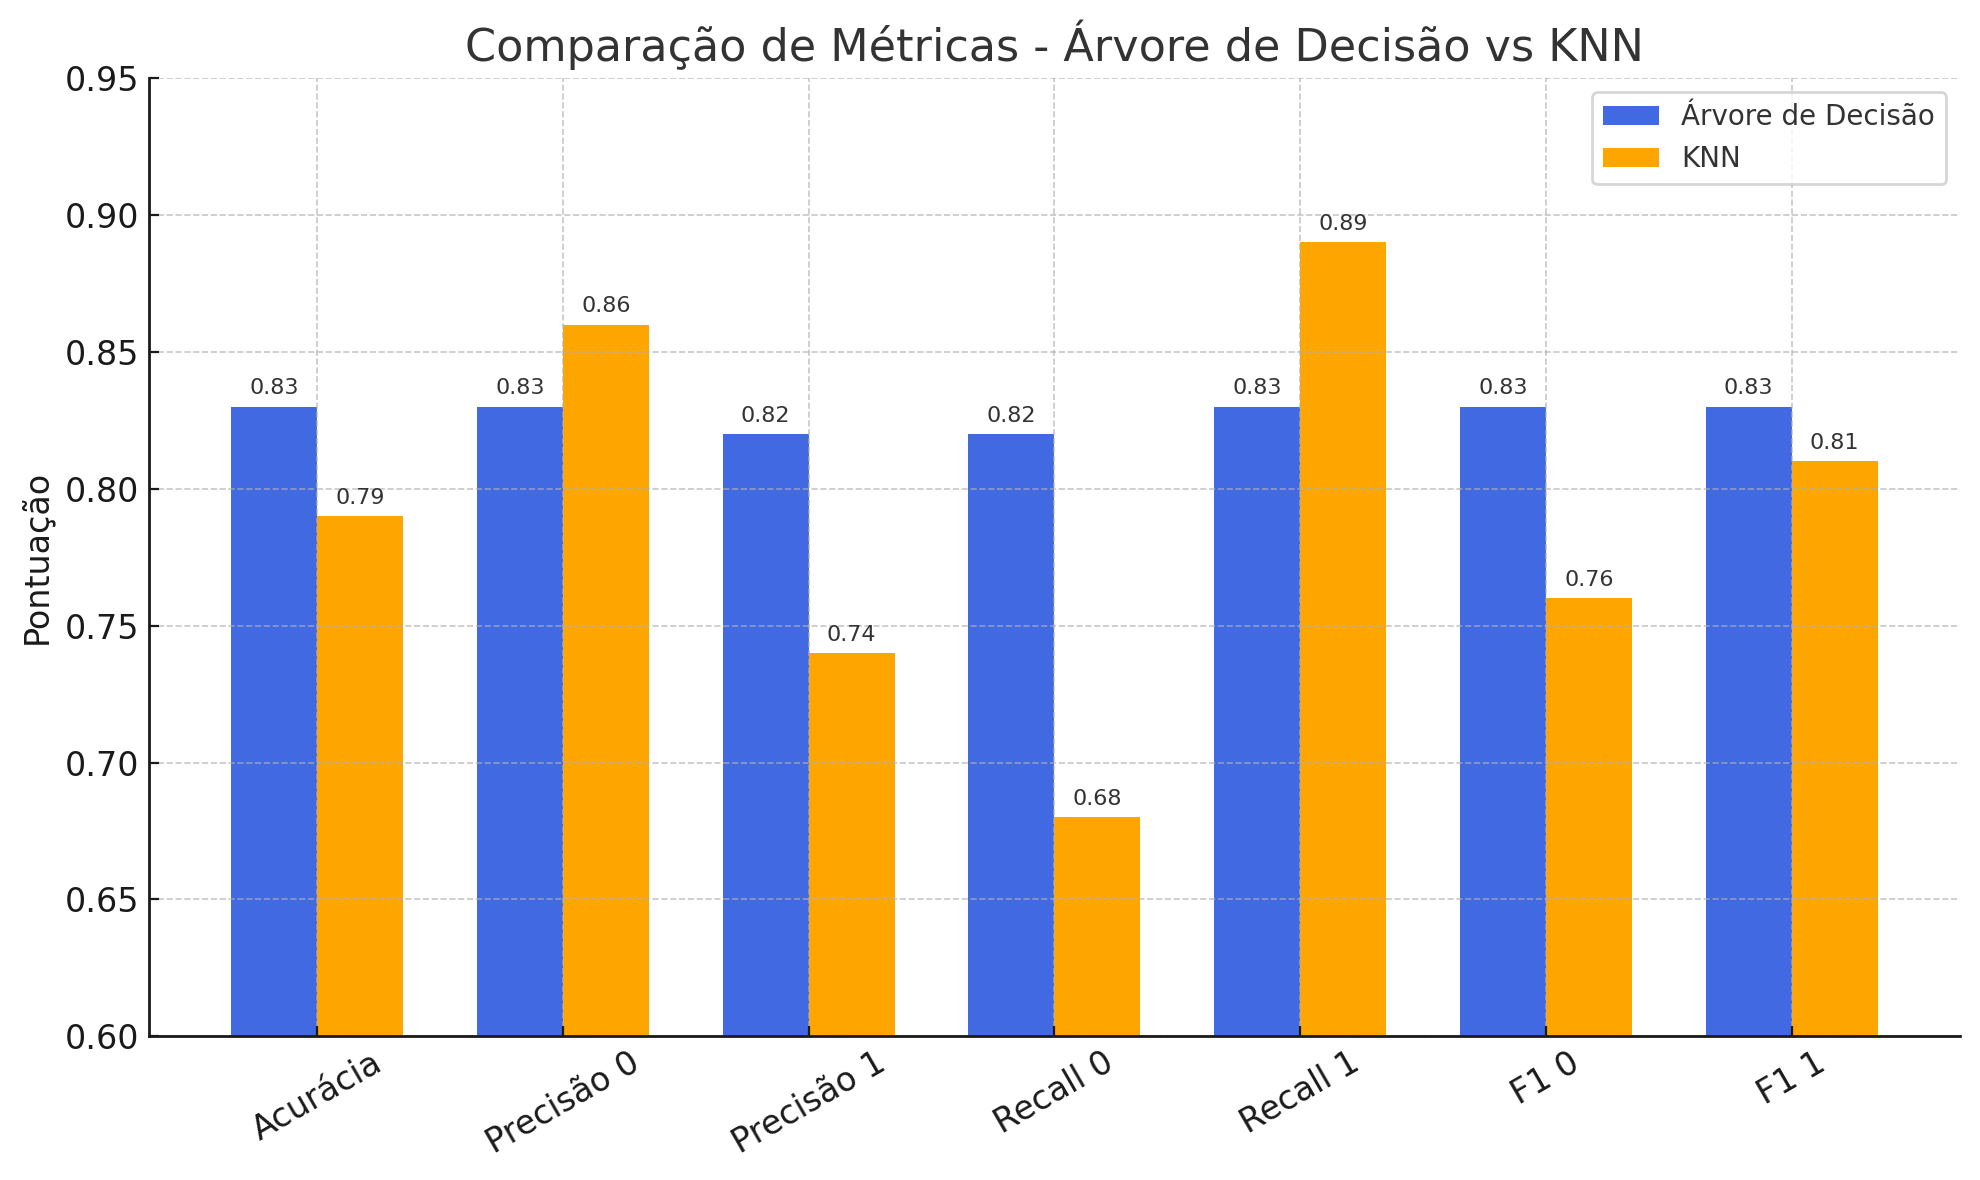

In [61]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.612036,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.387964,0.612036,0.0,0.387964,0.000000,0.387964,2.0,30.063380,76.783290,1.002113
1,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,14.0,24.800000,321.700000,0.826667
2,0.444215,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.444215,0.000000,0.0,0.444215,0.555785,0.000000,1.0,43.483574,43.483574,1.449452
3,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,21.0,103.850000,2215.000000,3.461667
4,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,25.0,20.100000,486.050000,0.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,59.0,93.350000,5386.500000,3.111667
7757,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,49.0,106.650000,5168.100000,3.555000
7758,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,11.0,44.650000,472.250000,1.488333
7759,1.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,8.0,54.400000,475.100000,1.813333


# 📋  Interpretação e Conclusões

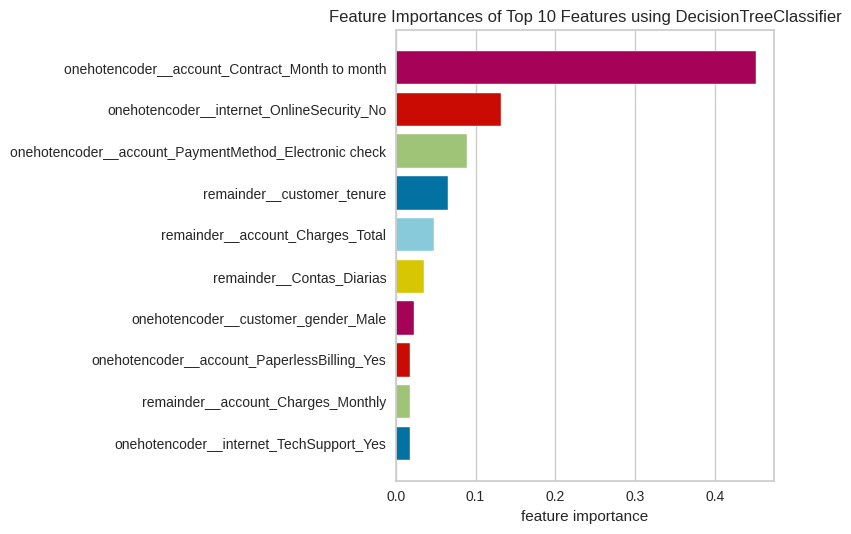

<Axes: title={'center': 'Feature Importances of Top 10 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [69]:
from yellowbrick.model_selection import FeatureImportances

x_train_df = pd.DataFrame(x_train, columns=one_hot_encoder.get_feature_names_out(colunas))

viz = FeatureImportances(
    arvore,
    relative=False,
    topn=10,
    feature_names=x_train_df.columns
)

viz.fit(x_train_df, y_train)
viz.show()


**Conclusões**

1.	account_Contract (tipo de contrato: Month-to-month / One year / Two year)

— Clientes em contratos Month-to-month costumam churnar muito mais.
Estratégia: ofertas de fidelização (descontos para migração para 1/2 ano), planos com benefícios exclusivos, testes gratuitos de add-ons.

2.	customer_tenure (tempo de permanência)

— Baixo tenure → maior probabilidade de churn.
Estratégia: onboarding proativo (primeiros 30/90 dias), check-ins automatizados, campanhas de satisfação inicial.

3.	account_Charges_Monthly / account_Charges_Total / Contas_Diarias

— Altas cobranças ou cobranças variáveis inesperadas podem levar ao churn.
Estratégia: transparência de cobrança, planos ajustados por perfil de consumo, alertas de gasto e parcelamento.

4.	internet_InternetService (especialmente 'Fiber optic')

— Clientes com fibra frequentemente têm maior churn quando a qualidade oscila — ou podem demandar planos com maiores expectativas.
Estratégia: SLAs claros, monitoramento de qualidade, desconto temporário em caso de instabilidade.

5.	internet_TechSupport / internet_OnlineSecurity / internet_DeviceProtection

— Ausência de suporte/segurança tende a impactar churn.
Estratégia: oferecer/up-sell de pacotes de suporte e segurança com trial; priorizar atendimento ao cliente destes usuários.

6.	account_PaymentMethod / account_PaperlessBilling

— Pagamentos eletrônicos e cobrança por “Electronic check” podem se correlacionar com churn (p.ex. falhas de pagamento ou fricção).
Estratégia: facilitar métodos de pagamento, avisos de falha de débito e reinstauração automática.

7.	phone_MultipleLines / phone_PhoneService / internet_StreamingTV e StreamingMovies

— Uso de serviços adicionais influencia retenção (quem usa vários serviços é mais “pegado” ao ecossistema).
Estratégia: pacotes multi-serviço com desconto, cross-sell contextualizado.

